Eksik veriler:
 id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


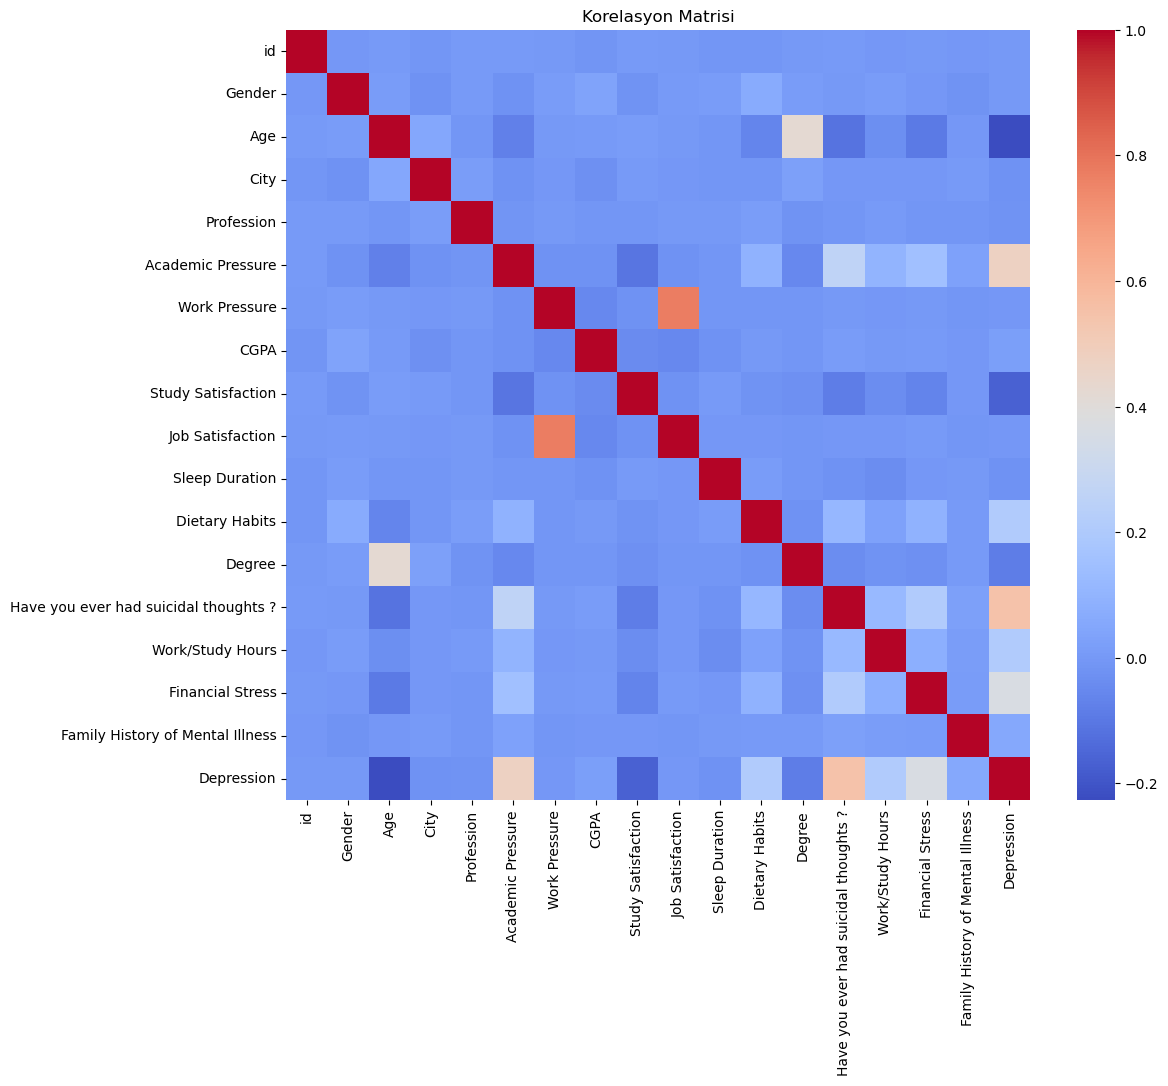


Lojistik Regresyon Sonuçları:
Accuracy: 0.8364092456549006
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80      2343
           1       0.85      0.87      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581

ROC-AUC: 0.8295842398618413

Random Forest Sonuçları:
Accuracy: 0.83049632682315
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79      2343
           1       0.84      0.87      0.86      3238

    accuracy                           0.83      5581
   macro avg       0.83      0.82      0.83      5581
weighted avg       0.83      0.83      0.83      5581

ROC-AUC: 0.8234267660730701


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# 1. Veri Yükleme
df = pd.read_csv("student_depression_dataset.csv", encoding="latin1")

# 2. Sütunları temizle
df.columns = df.columns.str.strip()

# 3. Eksik verileri kontrol et
print("Eksik veriler:\n", df.isnull().sum())

# 4. Kategorik sütunları sayısallaştır
cat_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# 5. Korelasyon haritası
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Korelasyon Matrisi")
plt.show()

# 6. Özellikler ve hedef değişken
X = df.drop(['Depression', 'id'], axis=1)
y = df['Depression']

# 7. Veriyi eğitim ve test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Sayısal verileri ölçekle
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 9. Lojistik Regresyon
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# 10. Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 11. Değerlendirme fonksiyonu
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Sonuçları:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_pred))

# 12. Sonuçları yazdır
evaluate_model("Lojistik Regresyon", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
